In [460]:
import pandas as pd
df = pd.read_csv('Prostate_Cancer.csv')
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [462]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [463]:
print(df['diagnosis_result'].unique())

['M' 'B']


In [464]:
diagosis_map = {'M': 1, 'B':0}
df['diagnosis_result'] = df['diagnosis_result'].map(diagosis_map)
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [465]:
df = df.drop(['id'], axis=1)
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,0,22,14,78,451,0.105,0.071,0.190,0.066
97,0,19,27,62,295,0.102,0.053,0.135,0.069
98,0,21,24,74,413,0.090,0.075,0.162,0.066


In [466]:
def z_score_normalizarion(series):
    for column in series.columns:
        if column != 'diagnosis_result':
            series[column] = (series[column] - series[column].mean()) / series[column].std()  
    return series

In [467]:
df = z_score_normalizarion(df)
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1.260480,-1.199703,2.290074,0.785460,2.750354,2.474504,1.586160,1.755620
1,0,-1.608905,-1.007134,1.529814,1.949011,2.750354,-0.780131,-0.395322,-0.943446
2,1,0.850568,1.688827,1.403103,1.564288,1.520993,0.544620,0.449244,-0.575392
3,1,-0.584125,-0.429428,-0.793205,-0.991145,-2.235388,2.572634,2.170860,3.963946
4,1,-1.608905,0.148278,1.614287,1.858304,2.613758,0.103036,-0.395322,-0.698077
...,...,...,...,...,...,...,...,...,...
95,1,1.260480,-0.429428,1.487577,1.755086,-0.801134,0.070326,0.546694,-1.066131
96,0,1.055524,-0.814565,-0.793205,-0.787837,0.155036,-0.910971,-0.102972,0.160717
97,0,0.440656,1.688827,-1.468993,-1.275778,-0.049857,-1.205360,-1.889555,0.528772
98,0,0.850568,1.111121,-0.962152,-0.906694,-0.869431,-0.845551,-1.012505,0.160717


In [468]:
import numpy as np 
  
from sklearn.model_selection import train_test_split 
  
from scipy.stats import mode 
  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn import metrics

import matplotlib.pyplot as plt

In [469]:
class K_Nearest_Neighbors_Classifier():  
      
    def __init__( self, K ): 
          
        self.K = K
          
    # Function to store training set     
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction
    def predict( self, X_test ):
            
        # no_of_test_examples, no_of_features 
          
        m_test, n = X_test.shape
          
        # initialize Y_predict 
        Y_predict = np.zeros(m_test)
          
        for i in range(m_test):
              
            x = X_test.to_numpy()[i]
              
            # find the K nearest neighbors from current test example 
            neighbors = np.zeros(self.K)
            neighbors = self.find_neighbors(x)
            
            # most frequent class in K neighbors 
            Y_predict[i] = mode(neighbors)[0][0]     
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors(self, x) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros(self.m) 
          
        for i in range(self.m) :   
            d = self.euclidean( x, self.X_train.to_numpy()[i])
            euclidean_distances[i] = d 
           
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train.to_numpy()[inds] 
        
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
        return np.sqrt(np.sum( np.square( x - x_train ))) 

In [470]:
class Radius_Nearest_Neighbors_Classifier() : 
     
    def __init__( self, r ) :
         
        self.r = r
         
    def fit( self, X_train, Y_train ) :
         
        self.X_train = X_train
         
        self.Y_train = Y_train
         
        # no_of_training_examples, no_of_features
         
        self.m, self.n = X_train.shape
              
    def predict( self, X_test ) :
         
        self.X_test = X_test
         
        # no_of_test_examples, no_of_features
         
        self.m_test, self.n = X_test.shape
         
        # initialize Y_predict
         
        Y_predict = np.zeros( self.m_test )
         
        for i in range( self.m_test ) :
             
            x = self.X_test[i]
             
            # find the number of neighbors within a fixed 
            # radius r of current training example
             
            neighbors = self.find_neighbors( x )
             
            # most frequent class in the circle drawn by current 
            # training example of fixed radius r
             
            Y_predict[i] = mode( neighbors )[0][0]
             
        return Y_predict
           
    def find_neighbors( self, x ) :
         
        # list to store training examples which will fall in the circle
         
        inside = []
         
        for i in range( self.m ) :
             
            d = self.euclidean( x, self.X_train[i] )
             
            if d <= self.r :
                 
                inside.append( self.Y_train[i] )
 
        inside_array = np.array( inside )
                 
        return inside_array
     
    # Function to calculate euclidean distance
             
    def euclidean( self, x, x_train ) :
         
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [471]:
def confusion_matrix(y_test, y_predict):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_predict)):
        if (y_predict[i] == 1 and y_test[i] == 1):
            TP = TP + 1
        elif (y_predict[i] == 1 and y_test[i] == 0):
            FP = FP + 1
        elif (y_predict[i] == 0 and y_test[i] == 0):
            TN = TN + 1
        elif (y_predict[i] == 0 and y_test[i] == 1):
            FN = FN + 1
    
    return TP, FP, TN, FN

In [472]:
x= df.loc[:, df.columns != 'diagnosis_result']
y = df['diagnosis_result']
print(x)
print(y)

      radius   texture  perimeter      area  smoothness  compactness  \
0   1.260480 -1.199703   2.290074  0.785460    2.750354     2.474504   
1  -1.608905 -1.007134   1.529814  1.949011    2.750354    -0.780131   
2   0.850568  1.688827   1.403103  1.564288    1.520993     0.544620   
3  -0.584125 -0.429428  -0.793205 -0.991145   -2.235388     2.572634   
4  -1.608905  0.148278   1.614287  1.858304    2.613758     0.103036   
..       ...       ...        ...       ...         ...          ...   
95  1.260480 -0.429428   1.487577  1.755086   -0.801134     0.070326   
96  1.055524 -0.814565  -0.793205 -0.787837    0.155036    -0.910971   
97  0.440656  1.688827  -1.468993 -1.275778   -0.049857    -1.205360   
98  0.850568  1.111121  -0.962152 -0.906694   -0.869431    -0.845551   
99 -0.174213  1.688827  -0.117418 -0.187294   -0.323049    -0.207708   

    symmetry  fractal_dimension  
0   1.586160           1.755620  
1  -0.395322          -0.943446  
2   0.449244          -0.575392  

In [473]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0 )

0.8666666666666667


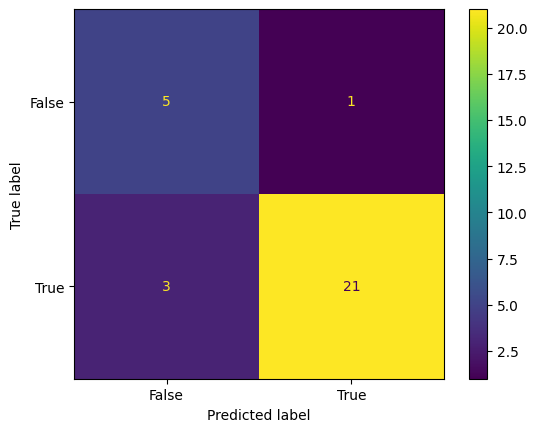

In [474]:
built_in_knn_model = KNeighborsClassifier( n_neighbors = 7 ) 
built_in_knn_model.fit( X_train, Y_train )
Y_pred_built_in = built_in_knn_model.predict( X_test )
score_built_in = metrics.accuracy_score(Y_test, Y_pred_built_in)
confusion_metric_built_in = metrics.confusion_matrix(Y_test, Y_pred_built_in)
print(score_built_in)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_metric_built_in, display_labels = [False, True])
cm_display.plot()
plt.show()

0.8666666666666667


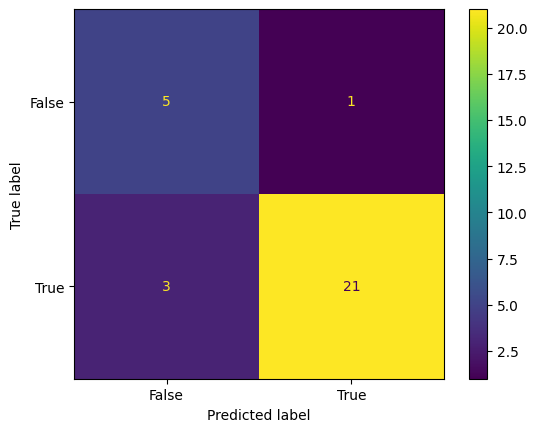

In [475]:
implemented_knn_model = K_Nearest_Neighbors_Classifier(K = 7) 
implemented_knn_model.fit( X_train, Y_train )
Y_pred_implemented = implemented_knn_model.predict(X_test)
score_built_in = metrics.accuracy_score(Y_test, Y_pred_implemented)
confusion_metric_built_in = metrics.confusion_matrix(Y_test, Y_pred_implemented)
print(score_built_in)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_metric_built_in, display_labels = [False, True])
cm_display.plot()
plt.show()

In [476]:
TP, FP, TN, FN = confusion_matrix(Y_test.to_numpy(), Y_pred_implemented)
print("True Positive: ", TP)
print("False Positive: ", FP)
print("True Negative: ", TN)
print("False Negative: ", FN)

print("Sensitivity: ", TP / (TP + FN))
print("Specificity: ", TN / (TN + FP))
print("precision: ", TP / (TP + FP))
print("Negative Predictive Value: ", TN / (TN + FN))
print("Accuracy: ", (TP + TN)  / (TP + TN + FP + FN))

True Positive:  21
False Positive:  1
True Negative:  5
False Negative:  3
Sensitivity:  0.875
Specificity:  0.8333333333333334
precision:  0.9545454545454546
Negative Predictive Value:  0.625
Accuracy:  0.8666666666666667


In [477]:
import warnings
warnings.filterwarnings('ignore')

In [478]:
X = df.iloc[:,1:].values
Y = df.iloc[:, 0].values

In [479]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0 )
X_test, X_validation, Y_test, Y_validation =  train_test_split(X_test,Y_test, test_size = 0.3, random_state = 0 )

In [480]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

def calc_best_radius():
    r = 0
    best_acc = 0
    for i in range(5, 1001, 1):
        radius_classifier = RadiusNeighborsClassifier(radius = i)
        radius_classifier.fit(X_train, Y_train)
        predictions = radius_classifier.predict(X_validation)
        accuracy = accuracy_score(Y_validation, predictions)
        if accuracy > best_acc:
            best_acc = accuracy
            r = i

    return r

In [481]:
# calculating best radius
r = calc_best_radius()
print(r)

5


built in model accuracy 0.7619047619047619


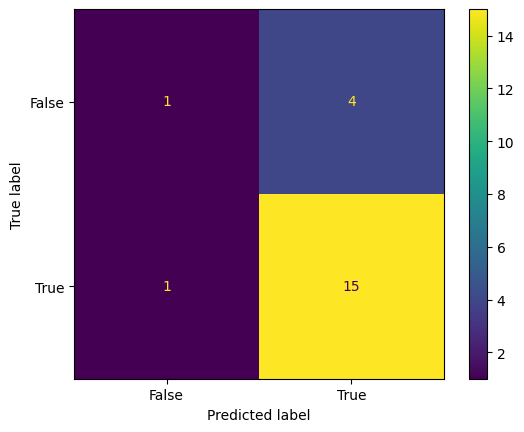

In [482]:
built_in_model = RadiusNeighborsClassifier(radius=r)
built_in_model.fit(X_train, Y_train)
predictions = built_in_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)

print("built in model accuracy", accuracy)

confusion_metric = metrics.confusion_matrix(Y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_metric, display_labels = [False, True])
cm_display.plot()
plt.show()


implemented model accuracy 0.7619047619047619


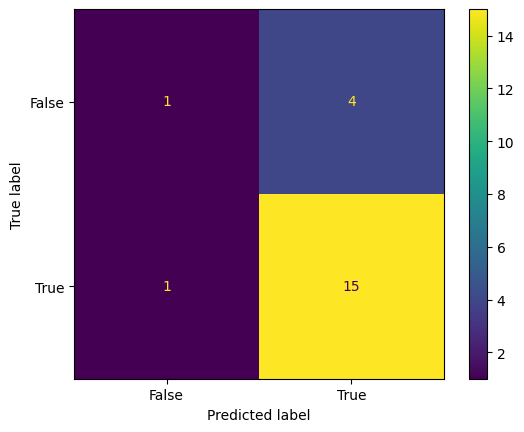

In [483]:

implemented_model = Radius_Nearest_Neighbors_Classifier(r = r)
implemented_model.fit(X_train,Y_train)
predictions = built_in_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)

print("implemented model accuracy", accuracy)

confusion_metric = metrics.confusion_matrix(Y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_metric, display_labels = [False, True])
cm_display.plot()
plt.show()


In [484]:
TP, FP, TN, FN = confusion_matrix(Y_test, predictions)
print("True Positive: ", TP)
print("False Positive: ", FP)
print("True Negative: ", TN)
print("False Negative: ", FN)

print("Sensitivity: ", TP / (TP + FN))
print("Specificity: ", TN / (TN + FP))
print("precision: ", TP / (TP + FP))
print("Negative Predictive Value: ", TN / (TN + FN))
print("Accuracy: ", (TP + TN)  / (TP + TN + FP + FN))

True Positive:  15
False Positive:  4
True Negative:  1
False Negative:  1
Sensitivity:  0.9375
Specificity:  0.2
precision:  0.7894736842105263
Negative Predictive Value:  0.5
Accuracy:  0.7619047619047619
